In [26]:
import pandas as pd
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
%matplotlib inline 

In [4]:
G = nx.Graph()
G.add_node('fruits')
G.add_nodes_from(['apple', 'banana', 'grape'])
G.nodes()

NodeView((&#39;fruits&#39;, &#39;apple&#39;, &#39;banana&#39;, &#39;grape&#39;))

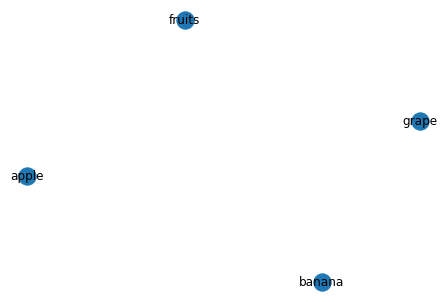

In [5]:
nx.draw(G, with_labels=True)
plt.show()

In [8]:
G.add_edge('fruits', 'apple')
G.add_edges_from([('fruits', 'banana'), ('fruits', 'grape')])
G.edges

EdgeView([(&#39;fruits&#39;, &#39;apple&#39;), (&#39;fruits&#39;, &#39;banana&#39;), (&#39;fruits&#39;, &#39;grape&#39;)])

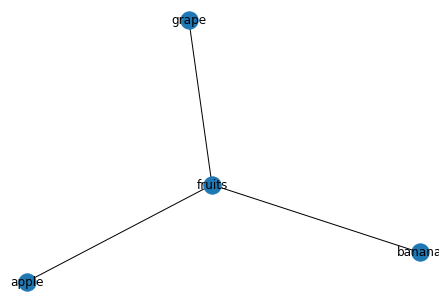

In [9]:
nx.draw(G, with_labels=True)
plt.show()

In [10]:
G.degree

DegreeView({&#39;fruits&#39;: 3, &#39;apple&#39;: 1, &#39;banana&#39;: 1, &#39;grape&#39;: 1})

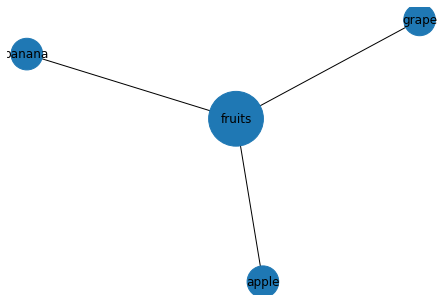

In [11]:
degree = nx.degree(G)
degree_dic = dict(degree)
nx.draw(G, node_size=[v*1000 for v in degree_dic.values()], with_labels=True)

In [17]:
list1 = ['I', 'love', 'you']
list2 = ['I', 'hate', 'me']
list3 = ['I', 'love', 'me']
list4 = ['I', 'hate', 'boy']
list5 = ['I', 'love', 'you', 'boy']
list6 = ['I', 'love', 'you', 'girl']
list7 = ['girl', 'love', 'boy']
list8 = ['I', 'love', 'girl']
list9 = ['I', 'hate', 'girl']


list_all = [list1, list2, list3, list4, list5, list6, list7, list8, list9]

In [18]:
G2 = nx.Graph()
for one in list_all:
    G2.add_nodes_from(one)
    print(one)
    for i in range(1, len(one)-1):
        print('i=', i)
        for j in range(len(one)-i):
            print('j=', j)
            G2.add_edge(one[j], one[i+j])

[&#39;I&#39;, &#39;love&#39;, &#39;you&#39;]
i= 1
j= 0
j= 1
[&#39;I&#39;, &#39;hate&#39;, &#39;me&#39;]
i= 1
j= 0
j= 1
[&#39;I&#39;, &#39;love&#39;, &#39;me&#39;]
i= 1
j= 0
j= 1
[&#39;I&#39;, &#39;hate&#39;, &#39;boy&#39;]
i= 1
j= 0
j= 1
[&#39;I&#39;, &#39;love&#39;, &#39;you&#39;, &#39;boy&#39;]
i= 1
j= 0
j= 1
j= 2
i= 2
j= 0
j= 1
[&#39;I&#39;, &#39;love&#39;, &#39;you&#39;, &#39;girl&#39;]
i= 1
j= 0
j= 1
j= 2
i= 2
j= 0
j= 1
[&#39;girl&#39;, &#39;love&#39;, &#39;boy&#39;]
i= 1
j= 0
j= 1
[&#39;I&#39;, &#39;love&#39;, &#39;girl&#39;]
i= 1
j= 0
j= 1
[&#39;I&#39;, &#39;hate&#39;, &#39;girl&#39;]
i= 1
j= 0
j= 1


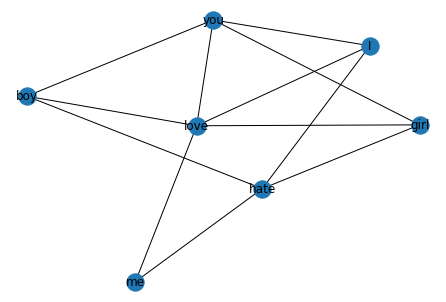

In [19]:
nx.draw(G2, with_labels=True)

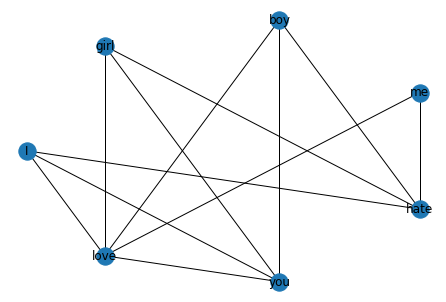

In [20]:
nx.draw_shell(G2, with_labels=True)

In [21]:
nx.betweenness_centrality(G2)
nx.closeness_centrality(G2)
nx.degree_centrality(G2)

{&#39;I&#39;: 0.5,
 &#39;love&#39;: 0.8333333333333333,
 &#39;you&#39;: 0.6666666666666666,
 &#39;hate&#39;: 0.6666666666666666,
 &#39;me&#39;: 0.3333333333333333,
 &#39;boy&#39;: 0.5,
 &#39;girl&#39;: 0.5}

In [22]:
test_news = """
European Commission President Ursula von der Leyen is self-isolating after participating in a meeting that was attended by a person who subsequently tested positive for Covid-19, she announced on Twitter.

Von der Leyen said she tested negative for the virus last week and will be tested again on Monday.
"I've been informed that I participated in a meeting last Tuesday attended by a person who yesterday tested positive for COVID-19. In accordance with regulations in force, I'm therefore self-isolating until tomorrow morning. I've tested negative on Thursday & am tested again today," she wrote on Monday.

Von der Leyen's announcement comes as coronavirus cases are on the rise in Europe, with new restrictions and local lockdowns imposed in countries across the continent.
In the Czech Republic, a state of emergency has been introduced for 30 days to help to curb the accelerating growth of new Covid-19 cases and to relieve the pressure on the health care system in the country, as a total of 1,841 new cases were recorded by the Ministry of Health on Sunday.

In France, Prime Minister Jean Castex confirmed the Greater Paris area is to be be classified as a "maximum alert" zone, with measures in effect from Tuesday, following a rise in the number of coronavirus cases. A press release from the Prime Minister's office says the zone has crossed the three thresholds that would put it in such an alert category: disease incidence rate, incidence rate for the elderly and occupancy rate of resuscitation beds by Covid-19 patients.
"""

In [23]:
corpus = test_news.split('.')

In [29]:
cv = CountVectorizer(ngram_range=(1,1), stop_words='english')
X = cv.fit_transform(corpus)
Co_ocurrence = (X.T * X)
Co_ocurrence.setdiag(0)

In [31]:
names = cv.get_feature_names()
df = pd.DataFrame(data=Co_ocurrence.toarray(), columns=names, index=names)
df.to_csv('gephi.csv', sep = ',')

Gephi Screenshot

![gp_reingold](gp_reingold.png)